In [133]:
import numpy as np
import pandas as pd

# Load the data
train = pd.read_csv("input/customer_churn_dataset-training-master.csv")
test = pd.read_csv("input/customer_churn_dataset-testing-master.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [134]:
# remove id and categorical features
train = train.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [135]:
test = test.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0


In [136]:
# check for missing values
train.isnull().sum()

Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
dtype: int64

In [137]:
# remove missing values
train = train.dropna()
train.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [138]:
# check for missing values
test.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [139]:
# shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Remove whitespace from column names
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

train.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
0,43.0,53.0,7.0,2.0,4.0,452.00,23.0,1.0
1,33.0,50.0,13.0,0.0,1.0,557.48,17.0,0.0
2,33.0,39.0,17.0,4.0,13.0,319.42,6.0,1.0
3,38.0,17.0,25.0,0.0,16.0,573.80,9.0,0.0
4,19.0,20.0,2.0,5.0,15.0,931.00,8.0,1.0


In [140]:
# Prepare train and test data
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['Churn'], axis=1)
y_test = test['Churn']

In [141]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_train_standardized

array([[ 0.29149196,  1.26008533, -1.02576935, ..., -1.08569435,
        -0.7459061 ,  0.99103488],
       [-0.51221439,  1.08622981, -0.32697621, ..., -1.4489761 ,
        -0.30787119,  0.29305188],
       [-0.51221439,  0.44875958,  0.13888589, ...,  0.0041509 ,
        -1.29648125, -0.98658361],
       ...,
       [ 0.8540864 , -1.7534103 , -1.2587004 , ..., -0.7224126 ,
         1.40107955, -0.40493111],
       [-1.39629137,  0.21695223,  0.60474798, ...,  0.12524482,
        -0.28648439,  1.45635688],
       [ 0.29149196,  0.97032613,  1.42000665, ...,  0.60962048,
        -0.21601177,  0.52571288]])

In [142]:
# Normalize the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_train_normalized

array([[0.09393215, 0.11577684, 0.01529128, ..., 0.00873787, 0.9873798 ,
        0.05024278],
       [0.05881316, 0.08911085, 0.02316882, ..., 0.00178222, 0.99355037,
        0.03029769],
       [0.10176796, 0.12027123, 0.05242592, ..., 0.04009041, 0.98505221,
        0.01850327],
       ...,
       [0.05152542, 0.00103051, 0.00515254, ..., 0.00721356, 0.99856268,
        0.01133559],
       [0.03891347, 0.06190779, 0.03714467, ..., 0.02476312, 0.99517653,
        0.04775744],
       [0.07357556, 0.08213086, 0.04790967, ..., 0.03079907, 0.99173011,
        0.03251013]])

In [143]:
# Perform PCA on the standardized data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_standardized)
X_train_pc_standardized = pca.transform(X_train_standardized)
X_test_pc_standardized = pca.transform(X_test_standardized)
X_train_pc_standardized

array([[-0.08572568,  1.60466381],
       [-1.34818843,  0.98416052],
       [ 0.26954422,  0.25142488],
       ...,
       [-0.68200436, -0.37167026],
       [-0.5480166 , -0.26196684],
       [ 0.12194544, -0.33360566]])

In [144]:
# Perform PCA on the normalized data
pca = PCA(n_components=2)
pca.fit(X_train_normalized)
X_train_pc_normalized = pca.transform(X_train_normalized)
X_test_pc_normalized = pca.transform(X_test_normalized)
X_train_pc_normalized

array([[ 0.03434805, -0.03819948],
       [-0.01068335, -0.03738355],
       [ 0.0518155 , -0.03392793],
       ...,
       [-0.07160338,  0.02834627],
       [-0.02643337, -0.02067885],
       [ 0.00954166, -0.01823767]])

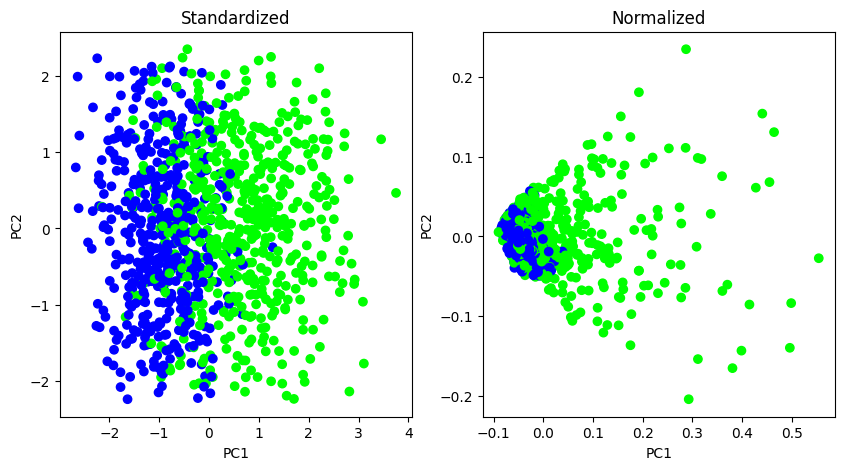

In [145]:
# Plot the data
import matplotlib.pyplot as plt

nr_samples = 1000
plot_idx = 1
fig = plt.figure(figsize=(10, 5))

for pc_data, title in zip([X_train_pc_standardized, X_train_pc_normalized], ['Standardized', 'Normalized']):
    # 3D if n_components > 2
    if pca.n_components > 2:
        ax = fig.add_subplot(1, 2, plot_idx, projection='3d')
        ax.scatter(pc_data[:nr_samples, 0], pc_data[:nr_samples, 1], pc_data[:nr_samples, 2],
                   c=y_train[:nr_samples],
                   cmap='brg')
        ax.set_zlabel('PC3')
    else:
        ax = fig.add_subplot(1, 2, plot_idx)
        ax.scatter(pc_data[:nr_samples, 0], pc_data[:nr_samples, 1], c=y_train[:nr_samples],
                   cmap='brg')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(title)
    plot_idx += 1

plt.show()

In [146]:
# Train a logistic regression model with principal components from standardized data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pc_standardized, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc_standardized, y_train))
print("Test accuracy:", logreg.score(X_test_pc_standardized, y_test))

Train accuracy: 0.8287669679152149
Test accuracy: 0.5885916674433778


In [147]:
# Train a logistic regression model with principal components from normalized data
logreg = LogisticRegression()
logreg.fit(X_train_pc_normalized, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc_normalized, y_train))
print("Test accuracy:", logreg.score(X_test_pc_normalized, y_test))

Train accuracy: 0.7162411077235772
Test accuracy: 0.540497716469382


In [148]:
# Train a logistic regression model with all features
logreg = LogisticRegression()
logreg.fit(X_train_standardized, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_standardized, y_train))
print("Test accuracy:", logreg.score(X_test_standardized, y_test))

Train accuracy: 0.8440970709930313
Test accuracy: 0.5864324106005531


In [149]:
# Do PCA using duckDB
import duckdb

con = duckdb.connect()

# Load the data from CSV
con.execute('create table churn as select * from X_train')

# Return the first 5 rows
con.execute('select * from churn limit 5').fetchdf()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
0,43.0,53.0,7.0,2.0,4.0,452.00,23.0
1,33.0,50.0,13.0,0.0,1.0,557.48,17.0
2,33.0,39.0,17.0,4.0,13.0,319.42,6.0
3,38.0,17.0,25.0,0.0,16.0,573.80,9.0
4,19.0,20.0,2.0,5.0,15.0,931.00,8.0


In [150]:
import time

# Compute the variance for each column using duckDB
times = []
for col_normalized in X_train.columns:
    print("Computing variance for column:", col_normalized)
    query = f'select avg({col_normalized} * {col_normalized}) - avg({col_normalized}) * avg({col_normalized}) as var from churn'
    var = con.execute(query).fetchone()[0]
    print("Variance:", var)

    for i in range(1000):
        start = time.time()
        con.execute(query).fetchone()
        end = time.time()
        times.append(end - start)
print("Average time:", sum(times) / len(times))

Computing variance for column: Age
Variance: 154.8122073645793
Computing variance for column: Tenure
Variance: 297.75945213654813
Computing variance for column: Usage_Frequency
Variance: 73.72337835225596
Computing variance for column: Support_Calls
Variance: 9.426216433645134
Computing variance for column: Payment_Delay
Variance: 68.19544184549517
Computing variance for column: Total_Spend
Variance: 57985.95381084818
Computing variance for column: Last_Interaction
Variance: 73.89461890395972
Average time: 0.00045142875398908344


In [151]:
# Compute the variance for Age using pandas
times = []
for col_normalized in X_train.columns:
    print("Computing variance for column:", col_normalized)
    var = X_train[col_normalized].var()
    print("Variance:", var)

    for i in range(1000):
        start = time.time()
        X_train[col_normalized].var()
        end = time.time()
        times.append(end - start)
print("Average time:", sum(times) / len(times))

Computing variance for column: Age
Variance: 154.81255854724856
Computing variance for column: Tenure
Variance: 297.7601275868955
Computing variance for column: Usage_Frequency
Variance: 73.72354558953815
Computing variance for column: Support_Calls
Variance: 9.426237816479905
Computing variance for column: Payment_Delay
Variance: 68.19559654296847
Computing variance for column: Total_Spend
Variance: 57986.085348672554
Computing variance for column: Last_Interaction
Variance: 73.89478652969133
Average time: 0.0030621724128723146


In [152]:
from src.kronecker import massaged_svd, compute_shapes, kronecker_decomposition

# Decompose each column separately using pandas and numpy
rank = 10
krone_shapes = compute_shapes((X_train.shape[0], 1))
a_matrix_individual = np.zeros((krone_shapes[0][0], rank * X_train.shape[1]))
b_matrix_individual = np.zeros((krone_shapes[1][0], rank * X_train.shape[1]))
nr_cols = X_train.shape[1]

for col_idx, col_name in enumerate(X_train.columns):
    print("Decomposing column:", col_name)
    col_normalized = X_train[col_name].values
    col_normalized = np.sort(col_normalized)
    # Compute the shapes
    col_normalized = np.atleast_2d(col_normalized).T

    # Perform the decomposition
    u, s, v = massaged_svd(col_normalized, krone_shapes[0])

    # Compute the kronecker product decomposition
    a_s, b_s = kronecker_decomposition(u, s, v, krone_shapes[0], krone_shapes[1], k=rank)

    # Store the results
    col_approx = np.zeros(col_normalized.shape)
    for r in range(rank):
        a_matrix_individual[:, col_idx + r * nr_cols] = a_s[r][:, 0]
        b_matrix_individual[:, col_idx + r * nr_cols] = b_s[r][:, 0]
        col_approx += np.kron(a_s[r], b_s[r])

    # Compute the error
    print("Relative RMSE: ", np.sqrt(np.mean((col_normalized - col_approx) ** 2)) / np.mean(np.abs(col_normalized)))

Decomposing column: Age
Relative RMSE:  0.0006346472713092741
Decomposing column: Tenure
Relative RMSE:  0.0009160164084932558
Decomposing column: Usage_Frequency
Relative RMSE:  0.0011540881017398287
Decomposing column: Support_Calls
Relative RMSE:  0.00041382324813892164
Decomposing column: Payment_Delay
Relative RMSE:  0.001459579478540106
Decomposing column: Total_Spend
Relative RMSE:  3.832365100915135e-05
Decomposing column: Last_Interaction
Relative RMSE:  0.0011112547964621615


In [153]:
a_df = pd.DataFrame(a_matrix_individual,
                    columns=[f'{col_name}_{r}' for r in range(rank) for col_name in X_train.columns])
b_df = pd.DataFrame(b_matrix_individual,
                    columns=[f'{col_name}_{r}' for r in range(rank) for col_name in X_train.columns])

# Load the data
con.execute('create or replace table churn_a as select * from a_df')
con.execute('create or replace table churn_b as select * from b_df')

# Return the first 5 rows
con.execute('select * from churn_a limit 5').fetchdf()

,Age_0,Tenure_0,Usage_Frequency_0,Support_Calls_0,Payment_Delay_0,Total_Spend_0,Last_Interaction_0,Age_1,Tenure_1,Usage_Frequency_1,...,Payment_Delay_8,Total_Spend_8,Last_Interaction_8,Age_9,Tenure_9,Usage_Frequency_9,Support_Calls_9,Payment_Delay_9,Total_Spend_9,Last_Interaction_9
0,2.81809,0.16837,0.237201,0.000000e+00,0.000000e+00,3.916338,0.245158,0.031878,0.00205,0.002547,...,0.000000e+00,-0.337211,-0.000211,0.000339,-0.000008,-0.000073,0.000000e+00,0.000000e+00,0.330138,0.00017
1,2.81809,0.16837,0.237201,1.182683e-13,4.486456e-14,4.013357,0.245158,0.031878,0.00205,0.002547,...,-2.544575e-13,0.421527,-0.000211,0.000339,-0.000008,-0.000073,-1.156142e-13,5.468946e-13,0.060843,0.00017
2,2.81809,0.16837,0.237201,0.000000e+00,0.000000e+00,4.106115,0.245158,0.031878,0.00205,0.002547,...,1.760504e-15,-0.352405,-0.000211,0.000339,-0.000008,-0.000073,-5.051394e-14,4.515093e-15,0.531136,0.00017
3,2.81809,0.16837,0.237201,0.000000e+00,0.000000e+00,4.198751,0.245158,0.031878,0.00205,0.002547,...,2.293685e-14,-0.044501,-0.000211,0.000339,-0.000008,-0.000073,-2.740330e-14,-1.425128e-14,-0.061146,0.00017
4,2.81809,0.16837,0.237201,0.000000e+00,0.000000e+00,4.287366,0.245158,0.031878,0.00205,0.002547,...,-9.389352e-15,0.106588,-0.000211,0.000339,-0.000008,-0.000073,-1.595088e-14,-7.092801e-15,-0.142000,0.00017


In [154]:
# Compute the variances using duckDB and kronecker product
for col_normalized in X_train.columns:
    print("Computing variance for column:", col_normalized)
    query = f'select avg(a.{col_normalized}_0 * a.{col_normalized}_0) * avg(b.{col_normalized}_0 * b.{col_normalized}_0) - avg(a.{col_normalized}_0) * avg(b.{col_normalized}_0) * avg(a.{col_normalized}_0) * avg(b.{col_normalized}_0) as var from churn_a as a positional join churn_b as b'
    var = con.execute(query).fetchone()
    print("Variance:", var)

    for i in range(1000):
        start = time.time()
        con.execute(query).fetchone()
        end = time.time()
        times.append(end - start)

print("Average time:", sum(times) / len(times))

Computing variance for column: Age
Variance: (154.80064720438918,)
Computing variance for column: Tenure
Variance: (297.74463229253945,)
Computing variance for column: Usage_Frequency
Variance: (73.71542647649363,)
Computing variance for column: Support_Calls
Variance: (9.423366666104139,)
Computing variance for column: Payment_Delay
Variance: (68.18783321006381,)
Computing variance for column: Total_Spend
Variance: (57985.79521146935,)
Computing variance for column: Last_Interaction
Variance: (73.88717116886104,)
Average time: 0.001690372279712132


In [155]:
# Calculate the global sort order based on the vector length of each tuple using the standardized data
global_sort_order_standardized = np.argsort(np.linalg.norm(X_train_standardized, axis=1))

# Sort the data
X_train_sorted_by_standardized = X_train.iloc[global_sort_order_standardized]

# Print the first 5 rows
X_train_sorted_by_standardized.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
37394,37.0,32.0,16.0,3.0,13.0,592.33,15.0
421626,42.0,33.0,15.0,4.0,15.0,624.35,14.0
420913,36.0,29.0,15.0,3.0,12.0,642.83,13.0
205484,41.0,33.0,16.0,4.0,13.0,723.83,15.0
19187,39.0,29.0,13.0,3.0,14.0,598.99,16.0


In [156]:
# Calculate the global sort order based on the vector length of each tuple using the normalized data
global_sort_order_normalized = np.argsort(np.linalg.norm(X_train_normalized, axis=1))

# Sort the data
X_train_sorted_by_normalized = X_train.iloc[global_sort_order_normalized]

# Print the first 5 rows
X_train_sorted_by_normalized.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
9664,51.0,41.0,4.0,1.0,10.0,122.37,10.0
14787,34.0,25.0,9.0,7.0,8.0,299.00,19.0
325100,57.0,24.0,1.0,1.0,27.0,119.69,6.0
286863,58.0,50.0,25.0,9.0,13.0,680.00,30.0
79338,47.0,21.0,27.0,0.0,11.0,898.73,12.0


In [157]:
# Compute the shapes
rank = 10
krone_shapes = compute_shapes((X_train.shape[0], 1))
a_matrix_global_std = np.zeros((krone_shapes[0][0], rank * X_train.shape[1]))
b_matrix_global_std = np.zeros((krone_shapes[1][0], rank * X_train.shape[1]))
a_matrix_global_norm = np.zeros((krone_shapes[0][0], rank * X_train.shape[1]))
b_matrix_global_norm = np.zeros((krone_shapes[1][0], rank * X_train.shape[1]))
nr_cols = X_train.shape[1]

# Perform the decomposition
for col_idx, col_name in enumerate(X_train.columns):
    print("Decomposing column:", col_name)
    col_standardized = X_train_sorted_by_standardized[col_name].values
    col_normalized = X_train_sorted_by_normalized[col_name].values

    # Compute the shapes
    col_standardized = np.atleast_2d(col_standardized).T
    col_normalized = np.atleast_2d(col_normalized).T

    # Perform the decomposition
    u_std, s_std, v_std = massaged_svd(col_standardized, krone_shapes[0])
    u_norm, s_norm, v_norm = massaged_svd(col_normalized, krone_shapes[0])

    # Compute the kronecker product decomposition
    a_s_std, b_s_std = kronecker_decomposition(u_std, s_std, v_std, krone_shapes[0], krone_shapes[1], k=rank)
    a_s_norm, b_s_norm = kronecker_decomposition(u_norm, s_norm, v_norm, krone_shapes[0], krone_shapes[1], k=rank)

    # Store the results
    col_approx_std = np.zeros(col_standardized.shape)
    col_approx_norm = np.zeros(col_normalized.shape)

    for r in range(rank):
        a_matrix_global_std[:, col_idx + r * nr_cols] = a_s_std[r][:, 0]
        b_matrix_global_std[:, col_idx + r * nr_cols] = b_s_std[r][:, 0]
        col_approx_std += np.kron(a_s_std[r], b_s_std[r])

        a_matrix_global_norm[:, col_idx + r * nr_cols] = a_s_norm[r][:, 0]
        b_matrix_global_norm[:, col_idx + r * nr_cols] = b_s_norm[r][:, 0]
        col_approx_norm += np.kron(a_s_norm[r], b_s_norm[r])

    rmse_std = np.sqrt(np.mean((col_standardized - col_approx_std) ** 2)) / np.mean(np.abs(col_standardized))
    rmse_norm = np.sqrt(np.mean((col_normalized - col_approx_norm) ** 2)) / np.mean(np.abs(col_normalized))

    # Compute the error
    print("Relative RMSE standardized: ", rmse_std)
    print("Relative RMSE normalized: ", rmse_norm)

Decomposing column: Age
Relative RMSE standardized:  0.3022998574725026
Relative RMSE normalized:  0.30734787323381746
Decomposing column: Tenure
Relative RMSE standardized:  0.5354241464642058
Relative RMSE normalized:  0.5369497439025452
Decomposing column: Usage_Frequency
Relative RMSE standardized:  0.5270023313616485
Relative RMSE normalized:  0.5282773328934431
Decomposing column: Support_Calls
Relative RMSE standardized:  0.745574159866799
Relative RMSE normalized:  0.8284906558883882
Decomposing column: Payment_Delay
Relative RMSE standardized:  0.600624253341177
Relative RMSE normalized:  0.6196010636356991
Decomposing column: Total_Spend
Relative RMSE standardized:  0.3495831284187646
Relative RMSE normalized:  0.3706098480164198
Decomposing column: Last_Interaction
Relative RMSE standardized:  0.5718170584356776
Relative RMSE normalized:  0.5773033566525698


In [158]:
# Sort all tuples using a global sort order bsed on the projection onto the first principal component
global_sort_order = np.argsort(X_train_pc_standardized[:, 0])

# Sort the data
X_train_sorted_by_pc = X_train.iloc[global_sort_order]

# Print the first 5 rows
X_train_sorted_by_pc.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
282812,20.0,59.0,24.0,0.0,0.0,955.86,3.0
240956,21.0,45.0,28.0,0.0,0.0,976.69,3.0
333613,20.0,32.0,27.0,0.0,0.0,964.56,2.0
135567,22.0,55.0,30.0,0.0,1.0,999.97,6.0
97611,21.0,41.0,23.0,0.0,0.0,976.14,3.0


In [159]:
# Compute the shapes
rank = 10
krone_shapes = compute_shapes((X_train.shape[0], 1))
a_matrix_global_pc = np.zeros((krone_shapes[0][0], rank * X_train.shape[1]))
b_matrix_global_pc = np.zeros((krone_shapes[1][0], rank * X_train.shape[1]))
nr_cols = X_train.shape[1]

# Perform the decomposition
for col_name in X_train.columns:
    print("Decomposing column:", col_name)
    col = X_train_sorted_by_pc[col_name].values

    # Compute the shapes
    col = np.atleast_2d(col).T

    # Perform the decomposition
    u, s, v = massaged_svd(col, krone_shapes[0])

    # Compute the kronecker product decomposition
    a_s, b_s = kronecker_decomposition(u, s, v, krone_shapes[0], krone_shapes[1], k=rank)

    # Store the results
    col_approx = np.zeros(col.shape)

    for r in range(rank):
        a_matrix_global_pc[:, col_idx + r * nr_cols] = a_s[r][:, 0]
        b_matrix_global_pc[:, col_idx + r * nr_cols] = b_s[r][:, 0]
        col_approx += np.kron(a_s[r], b_s[r])

    rmse = np.sqrt(np.mean((col - col_approx) ** 2)) / np.mean(np.abs(col))

    # Compute the error
    print("Relative RMSE: ", rmse)

Decomposing column: Age
Relative RMSE:  0.27164391810609356
Decomposing column: Tenure
Relative RMSE:  0.5339522792406465
Decomposing column: Usage_Frequency
Relative RMSE:  0.5263297689583848
Decomposing column: Support_Calls
Relative RMSE:  0.5766861661991755
Decomposing column: Payment_Delay
Relative RMSE:  0.528935649552289
Decomposing column: Total_Spend
Relative RMSE:  0.2911782533831807
Decomposing column: Last_Interaction
Relative RMSE:  0.5519094423983848
